## Metropolis Algorithm

The transition probability given x is computed as:

$T(y|x) = q(y|x) \cdot  \min(1, P(y)/P(x))$

where $P$ is the pdf, $y$ is the new state given $x$ the initial state. $q$ is the step, in this case we select a gaussian distribution $q=N(0,1)$

To proof that this works we need to ensure that the probability of transitioning from x to y and from y to x ensures the ratio between P(x)/P(y) of the target pdf. (Bayesian inference)

$P(x) \cdot T(y|x) = P(y) \cdot T(x|y)$


if $P(y) >= P(x)$;

$T(x|y) =  q(x|y) P(x)/P(y)$

$T(y|x) = q(y|x)$

because the normal distribution $q(y|x)=q(x|y)$, the bayesian works. The same happens if considering $P(y) < P(x)$. The ratio in the algorithm ensures that the probabilities are maintained

Not normalized:  2.5066282746277873


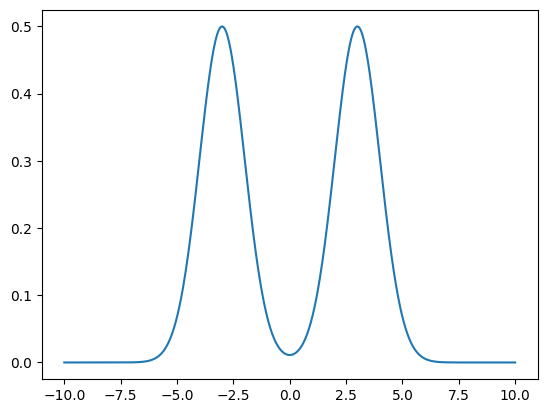

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def target_pdf_bimodal(x):
    return 0.5 * np.exp(-0.5 * (x - 3)**2) + 0.5 * np.exp(-0.5 * (x + 3)**2)

x = np.linspace(-10, 10, 1000)
y = target_pdf_bimodal(x)

print("Not normalized: ", np.trapz(y, x))
plt.plot(x, y)
plt.show()

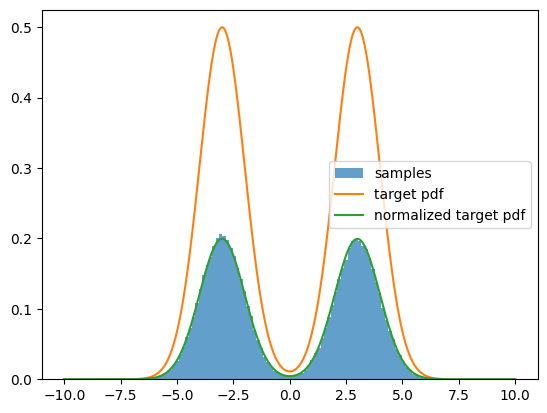

In [16]:
def metropolis_hastings(target_pdf, num_samples, initial_state):
    samples = np.zeros(num_samples)
    
    #we init the chain with the initial state
    samples[0] = initial_state
    current_state = target_pdf(initial_state)
    
    for i in range(1, num_samples):
        
        proposed_state = current_state + np.random.normal(0, 1)
        
        #compute the pdf's here, proposed and current
        proposed_pdf = target_pdf(proposed_state)
        current_pdf = target_pdf(current_state)
        
        #compute the acceptance ratio
        acceptance_ratio = proposed_pdf / current_pdf
        
        #accept or reject the proposed state
        if np.random.rand() < acceptance_ratio:
            current_state = proposed_state
            current_pdf = proposed_pdf
        
        samples[i] = current_state

    return samples

samples = metropolis_hastings(target_pdf_bimodal, 500000, 0)
plt.hist(samples, bins=100, density=True,alpha=0.7, label="samples")
plt.plot(x, y, label="target pdf")
plt.plot(x, y/np.trapz(y, x), label="normalized target pdf")
plt.legend()
plt.show()
